<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/scikit_learn_introduction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

[Scikit-learn](https://scikit-learn.org/) (often referred to as sklearn) provides a wide array of statistical models and machine learning algorithms. Although it is written in Python, sklearn’s performance is attributed to its usage of NumPy for high-performance linear algebra and array operations. Furthermore, some core algorithms are written in [Cython](https://en.wikipedia.org/wiki/Cython) to improve performance. 

In this notebook, **a (minimal) introduction to Scikit-learn for classification** tasks will be given.

# Introduction to scikit-learn

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/320px-Scikit_learn_logo_small.svg.png"></center>

Scikit-learn integrates well with many Python libraries, such as Matplotlib for plotting, NumPy for array vectorization, pandas dataframes, SciPy, and many more. Main features are summarized:
*   Simple and efficient tools for predictive data analysis
*   Accessible to everybody, and reusable in various contexts
*   Built on NumPy, SciPy, and Matplotlib
*   Open source, commercially usable - BSD license

Latest version of Scikit-learn is `scikit-learn 0.24 (Jan 2021)`.

At the time of writing this notebook, version [0.22.2.post1](https://scikit-learn.org/stable/whats_new/v0.22.html#) (March 3 2020) was obtained.



```python
import sklearn

print("Scikit-learn (sklearn) version: '{}'".format(sklearn.__version__))
```
The obtained output was: `Scikit-learn (sklearn) version: '0.22.2.post1'`

In case of need, we can upgrade with pip:

`!pip install -U scikit-learn`

It is recommended to see "[An introduction to machine learning with scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)" tutorial. In this tutorial, they provide the machine learning vocabulary to be used through the scikit-learn documentation. 


# Scikit-learn for classification

Our task in this notebook to fit an [estimator](https://en.wikipedia.org/wiki/Estimator) to be able to predict the classes to which unseen samples belong. In statistics, an estimator is a rule for calculating an estimate of a given quantity based on observed data. 

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

As we are introducing a classification task (identifying which category an object belongs to), we are going to use a very simple dataset for classification purposes. In this sense, the `sklearn.datasets` module includes utilities to load datasets, including methods to load and fetch popular reference datasets:
*   the boston house-prices dataset (regression)
*   the iris dataset (classification)
*   the diabetes dataset (regression)
*   the digits dataset (classification)
*   the physical excercise linnerud dataset (regression)
*   the wine dataset (classification)
*   the breast cancer wisconsin dataset (classification)

In this case, we are going to use [the iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).






# Introduction to Iris dataset

The data set consists of `150` samples from each of `3` species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor). `4` features were measured from each sample: the length and the width of the sepals and petals, in centimeters:

*   `150` samples
*   `3` labels: species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor)
*   `4` features: Sepal Length, Sepal Width, Petal Length, Petal Width in cm


Scikit-learn only works if data is stored as **numeric data**, irrespective of it being a regression or a classification problem. It also requires the arrays to be stored at NumPy arrays for optimization. Since, this dataset is loaded from scikit-learn, everything is appropriately formatted.

We are going to download from the [Wikipedia article "Iris flower data set"](https://en.wikipedia.org/wiki/Iris_flower_data_set) one sample image for each of the tree aforementioned species of iris to see how they look like:

In [ ]:
# Turn off wget’s output: '-q' (or '-nv' for no verbose output):
!wget https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg -O iris_setosa.jpg -q
!wget https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg -O iris_versicolor.jpg -q
!wget https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg -O iris_virginica.jpg -q

Once downloaded the images, we show them in a Figure. To do it, we are going to install [colaboratory-utils](https://github.com/albertofernandezvillan/colaboratory-utils), which provides the function `show_img_plt()`. This function will be used later to show the three images, which we have downloaded in the previous step, in a single figure.

In [ ]:
!pip install git+git://github.com/albertofernandezvillan/colaboratory-utils.git -q

We include here a utility function, which we have called `resize()`, whose purpose is to resize the images to a common size (just for visualization purposes):

In [ ]:
# Resize function to show the images with the same output size
import cv2

def resize(img, desired_size=(200, 200)):
  res_img = cv2.resize(img, desired_size)
  return res_img

At this point we make use of `show_img_plt()` from `colaboratory_utils` and `resize()` function (previously defined) to show the three downloaded images in a figure.

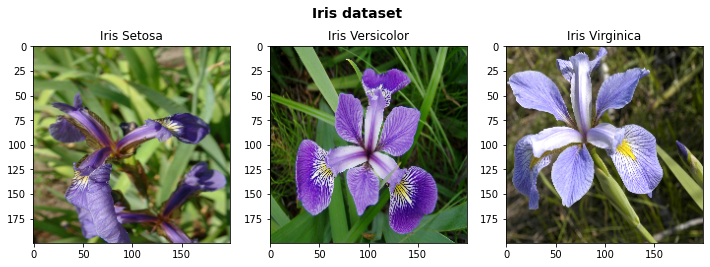

In [ ]:
from colaboratory_utils import show_img_plt
import matplotlib.pyplot as plt
import cv2

# Create the dimensions of the figure and set title:
plt.figure(figsize=(12, 4))
plt.suptitle("Iris dataset", fontsize=14, fontweight='bold')

show_img_plt(resize(cv2.imread("/content/iris_setosa.jpg")), title='Iris Setosa', n_rows=1, n_cols=3, pos=1)
show_img_plt(resize(cv2.imread("/content/iris_versicolor.jpg")), title='Iris Versicolor', n_rows=1, n_cols=3, pos=2)
show_img_plt(resize(cv2.imread("/content/iris_virginica.jpg")), title='Iris Virginica', n_rows=1, n_cols=3, pos=3)

# Show the created image:
plt.show()

At this point, we are ready to import the Iris dataset and show (print) some of its properties.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names: '{}'".format(feature_names))
print("Target names: '{}'".format(target_names))
print("First 5 rows of x: \n '{}'".format(x[:5]))
print("First 5 rows of y: '{}'".format(y[:5]))
print("Shape of x: '{}'".format(x.shape))
print("Shape of y: '{}'".format(y.shape))

Feature names: '['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']'
Target names: '['setosa' 'versicolor' 'virginica']'
First 5 rows of x: 
 '[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]'
First 5 rows of y: '[0 0 0 0 0]'
Shape of x: '(150, 4)'
Shape of y: '(150,)'


Complete flowers are composed of four parts, sepals, petals, stamens, and pistils. In the following image, the differentiation between sepals and petals is shown (left) and also the four features in the dataset - *sepal length, sepal width, petal length, petal width* - are also shown (right).

<center><img src="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/petal_sepal.png" border="2px solid" width=500 px></center>

We are dealing with a supervised learning problem because we have measurements for which we know the correct species of iris (class). As we have three classes, this is a three-class classification problem, because our task here is to classify each sample in one of the three aforementioned classes (the species of Iris).

# Training and test sets

Splitting the dataset into training and test sets is a key process when estimating the model's performance. The standard approach is to train (fit) the model using the training set. Therefore, the training set is used to test our model when building and adjusting it. We also need a test set to test our model to see how accurate our predictions are. 

Note that, to build a well-performing machine learning  model, [both the training and test sets should come for the same distribution](https://www.coursera.org/lecture/machine-learning-projects/training-and-testing-on-different-distributions-Xs9IV). In this case, this will not happen, but keep this in mind. 

Another important point is how we split the data into training and test sets. We have to ensure that in both sets there are enough samples for each category (class) in order to both train the model and test the results properly. This is something that we are going to check later in this notebook.

The following example will split the data into `80:20` ratio, i.e. `80%` data will be used as training data and `20%` will be used as testing data.

`random_state` argument is used to guarantee that the split will always be the same. This is useful in the situations where you want reproducible results.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset for training and testing:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
print("x train shape: '{}'".format(x_train.shape))
print("x test shape: '{}'".format(x_test.shape))

x train shape: '(120, 4)'
x test shape: '(30, 4)'


At this point we have splited the dataset for training and testing. A good practice is to check if in both sets there are enough samples for each category (class). In connection with this, let's print the complete target class for all the samples in the dataset:



In [ ]:
print("Showing all the class target in the dataset: \n '{}'".format(y))

Showing all the class target in the dataset: 
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]'


As we can see, the first 50 samples correspond to the first class, the samples between 51 and 100 correspond to second class and the samples between 101 and 150 correspond to the third class. If the data is splited (for training and testing) in a wrong way, this could lead to incorrect or unexpected results.

Therefore, what we can do is to check the number of samples we have for each class in both the train and test sets.

We can call the NumPy function `np.count_nonzero(array == value)` with `array` as a NumPy array to count the number of times `value` appears in array. Despite the name of the function, `value` can be `0`.

In [ ]:
import numpy as np

def intances_for_each_class(array, flower_classes):
  ocurrences = []
  for flower_class in flower_classes:
    ocurrences.append(np.count_nonzero(array == flower_class))
  return ocurrences

We can call `intances_for_each_class()` function in order to see how it works and also check that works correclty.

In [ ]:
# We call intances_for_each_class() to see how it works:

my_classes = [0, 1, 2, 3, 4]
my_array = np.array([1, 2, 3, 4, 4, 4, 1])
my_results = intances_for_each_class(my_array, my_classes)
print("Obtained results: '{}'".format(my_results))

Obtained results: '[0, 2, 1, 1, 3]'


At this point, we can check how many samples for each class we have in both the training and test sets using the `intances_for_each_class()` function.

In [ ]:
flower_classes = [0, 1, 2]

ocurrences_training = intances_for_each_class(y_train, flower_classes)
ocurrences_testing = intances_for_each_class(y_test, flower_classes)

print("Ocurrences training: '{}'".format(ocurrences_training))
print("Ocurrences testing: '{}'".format(ocurrences_testing))
print("Showing 'y_test' values for checking purposes: '{}'".format(y_test))
print("Shape of 'y_test' : '{}'".format(y_test.shape))

Ocurrences training: '[37, 44, 39]'
Ocurrences testing: '[13, 6, 11]'
Showing 'y_test' values for checking purposes: '[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]'
Shape of 'y_test' : '(30,)'


# Training the model

Scikit-learn provides easy access to numerous different classification algorithms (estimators). Among these classifiers are:

*   Nearest Neighbors
*   Support Vector Machines
*   Decision Trees
*   Naive Bayes
*   Logistic Regression (*)

(*) Logistic regression, despite its name, is a linear model for classification rather than regression.


As commented previously, in Scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`. An example of an estimator is the class `sklearn.tree.DecisionTreeClassifier`, which implements [a decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

The `fit(x, y)` function trains the model where `x` is the NumPy array of inputs and `y` is the corresponding NumPy array of outputs.

In [ ]:
from sklearn import tree

# Create the decision tree classifier
tree_classifier=tree.DecisionTreeClassifier(random_state=0, max_depth=3)

# We can train the model with fit function:
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Scikit-learn also allows us to visualise our tree using the Graphviz library. [sklearn.tree.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) generates a GraphViz representation of the decision tree. In this sense, we are going to color the nodes based on the feature names. We are also going to display the class and feature information of each node.

In [ ]:
print("Remember, feature names are: '{}'".format(iris.feature_names))
print("And class names are '{}'".format(iris.target_names))

Remember, feature names are: '['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']'
And class names are '['setosa' 'versicolor' 'virginica']'


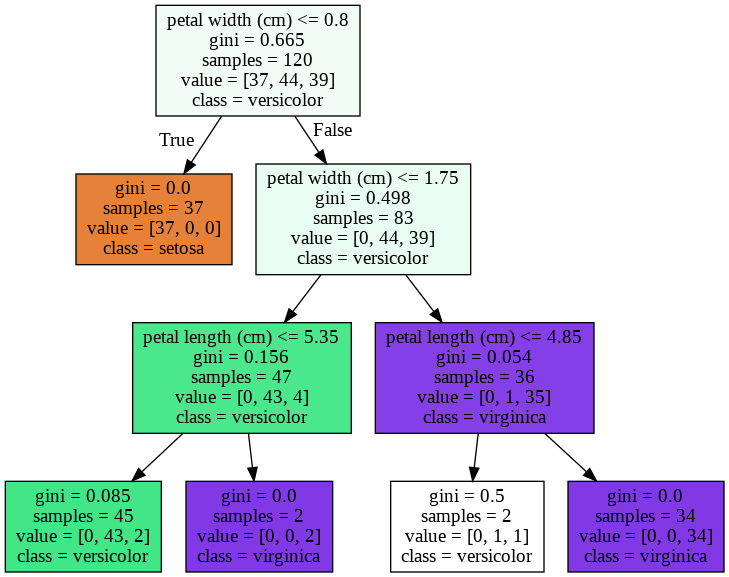

In [ ]:
import graphviz 
from IPython.display import Image

# Set the options to adapt the visualization:
options = tree.export_graphviz(tree_classifier, out_file=None, 
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True)
# Get the png image, save it and view it:
graph = graphviz.Source(options)  
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)
Image(png_bytes)

We can also export the tree as a text based diagram using [`sklearn.tree.export_text()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html). As it can be seen in the documentation, this method returns the text summary of all the rules in the decision tree.

In [ ]:
from sklearn.tree import export_text

# Get the tree rules
tree_rules = export_text(tree_classifier, feature_names = iris.feature_names)

# Print the result
print("Decision tree rules:\n\n{}".format(tree_rules))

Decision tree rules:

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



# Making predictions using the trained model

After training, the model is ready to make predictions. So here, before checking the accuracy of the trained model (using the test set) we are going to see how we can use the trained model to classify a new instance, that is a new sample we would like to know the class it belongs to.

Let’s state that we have an iris with the following measures:
*   sepal length of 5 cm
*   sepal width of 5 cm
*   petal length of 5 cm
*   petal width of 0.7999 cm.

Our task is to classify this new instance.

In [ ]:
# Set the values for a new sample:
new_sample = np.array([[5, 5, 5, 0.7999]])

# Predict the class for this new sample:
predicted_class = tree_classifier.predict(new_sample)

# Show the results in a 'friendly way':
# 1. Show the feature_names:
print("Features: '{}'".format(iris.feature_names))

# 2. Show the new_sample:
# Note: (Use enumerate to get the index with the element as you iterate)
print("New sample features:")
for index, feature in enumerate(new_sample[0]):
  print("{} of '{}'".format(iris.feature_names[index], feature))

# 3. Show the predicted class and its corresponding target name (class name):
pred_class = predicted_class[0]
class_name = iris.target_names[predicted_class[0]]
print("Predicted class: '{}', corresponding to: '{}'".format(pred_class, class_name))

Features: '['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']'
New sample features:
sepal length (cm) of '5.0'
sepal width (cm) of '5.0'
petal length (cm) of '5.0'
petal width (cm) of '0.7999'
Predicted class: '0', corresponding to: 'setosa'


Based on the representation of the decision tree in the figure above, we can check that (see the decision of the root node) if a `iris with a petal width (cm) < 0.8` will be classified as a `setosa` (see also the orange box for clarification). And this is what we have obtained.

As an additional example, we will see how to classify a collection of features as a virginica using these features:

*   sepal length of 1000 cm
*   sepal width of 1000 cm
*   petal length of 4.86 cm
*   petal width of 1.76 cm.

If an iris has a `petal length > 4.85` and a `petal width > 1.75` will be classified as a `virginica`. More specifically, if you follow the conditions in the tree above, you will see that three conditions that are checked until a leaf is reached are all `False`.

Note also that the other two  features will not be checked. In this sense, we have stablished the other two features (both sepal length and width) with 'outlier' values just because they will not be checked by the classifier. 



In [ ]:
# Set the values for a new sample:
new_sample_2 = np.array([[1000, 1000, 4.86, 1.76]])
predicted_class = tree_classifier.predict(new_sample_2)

print("Features: '{}'".format(iris.feature_names))
print("New sample features:")
for index, feature in enumerate(new_sample_2[0]):
  print("{} of '{}'".format(iris.feature_names[index], feature))

pred_class = predicted_class[0]
class_name = iris.target_names[predicted_class[0]]
print("Predicted class: '{}', corresponding to: '{}'".format(pred_class, class_name))

Features: '['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']'
New sample features:
sepal length (cm) of '1000.0'
sepal width (cm) of '1000.0'
petal length (cm) of '4.86'
petal width (cm) of '1.76'
Predicted class: '2', corresponding to: 'virginica'


As a final note in this section, we can also predict the class for more than one sample at a time. In this sense, we are going to predict the class for the two samples we have seen before in this section. In this sense, we can create the array `new_samples` using the values defined above for both samples (see commented line below), or we can make use of `new_sample` and `new_sample_2` to take their values using  [`numpy.squeeze()`](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html), which is used when [we want to remove single-dimensional entries from the shape of an array](https://www.geeksforgeeks.org/numpy-squeeze-in-python/). As an example of `numpy.squeeze()`:



```python
print("new_sample with shape '{}' and values '{}'".format(new_sample.shape, new_sample))
print("new_sample.squeeze() with shape '{}' and values '{}'".format(new_sample.squeeze().shape, new_sample.squeeze()))
```

returns:

```
new_sample with shape '(1, 4)' and values '[[5.     5.     5.     0.7999]]'
new_sample.squeeze() with shape '(4,)' and values '[5.     5.     5.     0.7999]'
```









So we create the two samples, get the predictions and show the obtained results

In [ ]:
# Create the two samples:
# new_samples = np.array([[5, 5, 5, 0.7999], [1000, 1000, 4.86, 1.76]])
new_samples = np.array([new_sample.squeeze(), new_sample_2.squeeze()])

# Get the predictions:
predicted_classes = tree_classifier.predict(new_samples)

# Show the predicted class and class name:
for predicted_class in predicted_classes:
  class_name = iris.target_names[predicted_class]
  print("Predicted class: '{}', corresponding to: '{}'".format(predicted_class, class_name))

Predicted class: '0', corresponding to: 'setosa'
Predicted class: '2', corresponding to: 'virginica'


# Measuring the accuracy of the trained model

As commented in previous section, after training, the model is ready to make predictions. In this sense, we have seen how to perform a prediction. So measuring the performance of the trained model follows a similar approach that seen above, but we have also the true class for each sample. Therefore, we can compare both the predicted classes and the true classes. Based on this comparison, we can calculate some metrics for measuring the performance of the trained model. 

All of this testing procedure can be performed very easily using in-built functions provided by scikit-learn. But before introducing it, we are going to see how to calculate the accuracy of the model using only NumPy operations. Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. 


Therefore, the first step is to get the predictions of the test set (`x_test`) using the `tree_classifier` we have just trained. Then, we compare the predictions and the true classes obtaining an array of True/False values. Finally, we calculate the accuracy based on the True/False values of this array. All of this is shown as follows.





In [ ]:
# 1. After training, the model is ready to make predictions:
tree_predictions = tree_classifier.predict(x_test)

In [ ]:
# 2. Get the comparisons (True/False) for each one:
comparisons = (tree_predictions == y_test)
print("comparisons array: \n '{}'".format(comparisons))

comparisons array: 
 '[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True]'


In [ ]:
# 3. Calculate the accuracy using np.mean():
my_accuracy = np.mean(comparisons)
print("The accuracy of the model is: '{}'".format(my_accuracy))

The accuracy of the model is: '0.9333333333333333'


To calculate the accuracy, we can also make use of the function `intances_for_each_class()` we have coded in a previous section. In this sense, we can calculate the number of instances corresponding to class `True` and the number of instances corresponding to class `False`. See next in order to see how we can calculate the accuracy of the model.

In [ ]:
# Define the classes (True and False in this case):
my_classes = [True, False]

# Transform the array of comparisons to a numpy array:
my_array = np.array(comparisons)

# Calculate the number of instances for each class:
my_results = intances_for_each_class(my_array, my_classes)
print("Number of instances for each class: '{}'".format(my_results))

# Calculate the accuracy:
my_accuracy = my_results[0]/(my_results[0] + my_results[1])
print("The accuracy of the model is: '{}'".format(my_accuracy))

Number of instances for each class: '[28, 2]'
The accuracy of the model is: '0.9333333333333333'


# Measuring the performance of the trained model using scikit-learn

To calculate the accuracy of the model using scikit-learn, we can make use of `accuracy_score()`:

In [ ]:
# Compare the predictions with the expected output to get the accuracy:
from sklearn.metrics import accuracy_score

print("Accuracy: '{}'".format(accuracy_score(y_test, tree_predictions)))

Accuracy: '0.9333333333333333'


Moreover, we can calculate other metrics to measure the performance of the trained model. In this sense, [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) builds a text report showing the main classification metrics.

In [ ]:
import sklearn.metrics as metrics

print(f"Classification report:\n"
      f"{metrics.classification_report(y_test, tree_predictions)}\n")

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30




We can also plot a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) of the true iris classes and the predicted iris classes.

Confusion matrix:
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]


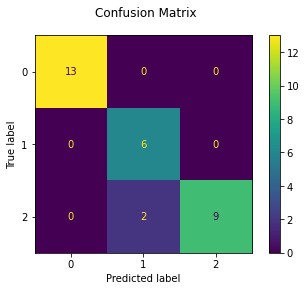

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


disp = metrics.plot_confusion_matrix(tree_classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Model persistence

After training and validating the model, if you are happy with the results, you can persist it for future uses so that you don't need to retrain it again. Therefore, we can save it on disk with the help of `dump()` and load it again with the help of `load()` once needed. Both methods are included in the[ `joblib` package](https://scikit-learn.org/stable/modules/model_persistence.html). We can also use [pickle](https://docs.python.org/3/library/pickle.html):

```
import pickle

s = pickle.dumps(my_classifier)
my_classifier_2 = pickle.loads(s)
```

But `joblib.dump()` and `joblib.load() `provide a replacement for pickle to work efficiently on arbitrary Python objects containing large data, in particular large NumPy arrays. Therefore, in the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (`dump()` & `load()`).


So the first step is to persist the model on disk using `joblib.dump(`):

In [ ]:
from joblib import dump

dump(tree_classifier, 'iris_tree_classifier.joblib')

['iris_tree_classifier.joblib']

Later you can load back the pickled model (possibly in another Python process or Colab session) with:

In [ ]:
from joblib import load

tree_classifier_iris = load('iris_tree_classifier.joblib')

We check that the model is ready to make predictions:

In [ ]:
# Create the two samples:
# new_samples = np.array([[5, 5, 5, 0.7999], [1000, 1000, 4.86, 1.76]])
new_samples = np.array([new_sample.squeeze(), new_sample_2.squeeze()])

# Get the predictions:
predicted_classes = tree_classifier_iris.predict(new_samples)

# Show the predicte class and class name:
for predicted_class in predicted_classes:
  class_name = iris.target_names[predicted_class]
  print("Predicted class: '{}', corresponding to: '{}'".format(predicted_class, class_name))

Predicted class: '0', corresponding to: 'setosa'
Predicted class: '2', corresponding to: 'virginica'


# Conclusions

Albeit simple, the iris flower classification problem is a good example to show how a machine learning problem should be approached using scikit-learn. More specifically, in this notebook we have covered:

*   A (short) introduction to scikit-learn
*   An introduction to iris dataset
*   Exploring both the training and tests sets
*   How to train a model
*   How to make predictions using the trained model
*   How to measure the accuracy of the model using NumPy operations
*   How to measure the performance of the trained model using scikit-learn
*   How to persist the model and load it again to make predictions making use of the "reconstructed" model

Related to the training of the model, we have used a decision tree classifier. The advantages of using decision tree classifiers are that they are easy to follow and interpret. Indeed, decision trees are quite similar to how people actually make choices in some situations.

Finally, in connection with model persistence, and in the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (`dump()` & `load()`), which is more efficient on objects that carry large NumPy arrays internally as is often the case for fitted scikit-learn estimators.